In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fresh-and-stale-classification/dataset/Test/rottenbanana/saltandpepper_Screen Shot 2018-06-12 at 8.53.54 PM.png
/kaggle/input/fresh-and-stale-classification/dataset/Test/rottenbanana/b_r063.png
/kaggle/input/fresh-and-stale-classification/dataset/Test/rottenbanana/b_r347.png
/kaggle/input/fresh-and-stale-classification/dataset/Test/rottenbanana/Screen Shot 2018-06-12 at 9.27.26 PM.png
/kaggle/input/fresh-and-stale-classification/dataset/Test/rottenbanana/rotated_by_45_Screen Shot 2018-06-12 at 8.58.13 PM.png
/kaggle/input/fresh-and-stale-classification/dataset/Test/rottenbanana/rotated_by_75_Screen Shot 2018-06-12 at 8.47.41 PM.png
/kaggle/input/fresh-and-stale-classification/dataset/Test/rottenbanana/rotated_by_75_Screen Shot 2018-06-12 at 8.56.30 PM.png
/kaggle/input/fresh-and-stale-classification/dataset/Test/rottenbanana/b_r018.png
/kaggle/input/fresh-and-stale-classification/dataset/Test/rottenbanana/saltandpepper_Screen Shot 2018-06-12 at 9.11.17 PM.png
/kaggle/inpu

In [4]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
from random import shuffle

In [3]:
import os
import cv2
from tqdm import tqdm

def load_rand():
    X = []
    list_dir = []  # Initialize list_dir here to avoid contamination from previous runs
    dir_path = '/kaggle/input/fresh-and-stale-classification/dataset/Train'
    
    # Define classes you want to exclude
    unwanted_classes = ['freshcapsicum', 'rottencapsicum', 'freshbittergroud', 'rottenbittergroud']
    
    for sub_dir in tqdm(os.listdir(dir_path)):
        print(f"Checking directory: {sub_dir}")  # Debugging print
        
        # Skip the unwanted classes
        if sub_dir in unwanted_classes:
            print(f"Skipping unwanted class: {sub_dir}")  # Debugging print
            continue  # Skip to the next iteration if it's an unwanted class
        
        # Add allowed class to list_dir
        list_dir.append(sub_dir)
        
        path_main = os.path.join(dir_path, sub_dir)
        i = 0
        
        for img_name in os.listdir(path_main):
            if i >= 6:
                break
            
            img_path = os.path.join(path_main, img_name)
            img = cv2.imread(img_path)
            if img is None:  # Check if the image was loaded correctly
                print(f"Image not loaded: {img_path}")  # Debugging print
                continue
            
            img = cv2.resize(img, (100, 100))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            X.append(img)
            i += 1
            
    print(f"Total images loaded: {len(X)}")  # Print total images loaded
    print(f"List of directories processed: {list_dir}")  # Print list_dir content
    return X, list_dir  # Return both X and list_dir


In [4]:
dir_path='/kaggle/input/fresh-and-stale-classification/dataset/Train'
dir_path_test='/kaggle/input/fresh-and-stale-classification/dataset/Test'

In [5]:
X,list_dir=load_rand()

  0%|          | 0/18 [00:00<?, ?it/s]

Checking directory: rottenbanana


  6%|▌         | 1/18 [00:00<00:07,  2.30it/s]

Checking directory: freshpotato


 11%|█         | 2/18 [00:00<00:05,  3.11it/s]

Checking directory: freshokra


 17%|█▋        | 3/18 [00:00<00:04,  3.37it/s]

Checking directory: rottentomato


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
 28%|██▊       | 5/18 [00:01<00:03,  3.85it/s]

Checking directory: rottenokra
Checking directory: freshoranges


 33%|███▎      | 6/18 [00:01<00:03,  3.38it/s]

Checking directory: rottenoranges


 39%|███▉      | 7/18 [00:02<00:03,  3.35it/s]

Checking directory: freshcucumber


 44%|████▍     | 8/18 [00:02<00:02,  3.61it/s]

Checking directory: rottencapsicum
Skipping unwanted class: rottencapsicum
Checking directory: freshtomato


libpng warning: iCCP: known incorrect sRGB profile
 56%|█████▌    | 10/18 [00:02<00:01,  4.42it/s]

Checking directory: freshbanana


 67%|██████▋   | 12/18 [00:03<00:01,  4.23it/s]

Checking directory: rottencucumber
Checking directory: rottenapples


 72%|███████▏  | 13/18 [00:03<00:01,  3.32it/s]

Checking directory: freshapples


 78%|███████▊  | 14/18 [00:04<00:01,  3.05it/s]

Checking directory: freshbittergroud
Skipping unwanted class: freshbittergroud
Checking directory: freshcapsicum
Skipping unwanted class: freshcapsicum
Checking directory: rottenbittergroud
Skipping unwanted class: rottenbittergroud
Checking directory: rottenpotato


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
100%|██████████| 18/18 [00:04<00:00,  4.11it/s]


Total images loaded: 84
List of directories processed: ['rottenbanana', 'freshpotato', 'freshokra', 'rottentomato', 'rottenokra', 'freshoranges', 'rottenoranges', 'freshcucumber', 'freshtomato', 'freshbanana', 'rottencucumber', 'rottenapples', 'freshapples', 'rottenpotato']


In [6]:
len(list_dir)
# X=np.array(X)
# X.shape

14

In [7]:
del X

In [31]:
import os
import cv2
from tqdm import tqdm
from random import shuffle

def load_rottenvsfresh():
    quality = ['fresh', 'rotten']
    X, Y = [], []
    z = []
    
    # Define classes you want to exclude
    unwanted_classes = ['freshcapsicum', 'rottencapsicum', 'freshbittergroud', 'rottenbittergroud']
    
    for cata in tqdm(list_dir):
        print(f"Processing category: {cata}")  # Debugging print
        
        # Skip unwanted classes
        if cata in unwanted_classes:
            print(f"Skipping unwanted class: {cata}")  # Debugging print
            continue
        
        path_main = os.path.join(dir_path, cata)
        
        # Load images based on the category
        if quality[0] in cata:
            for img_name in os.listdir(path_main):
                img = cv2.imread(os.path.join(path_main, img_name))
                img = cv2.resize(img, (100, 100))
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                z.append([img, 0])  # Label for fresh
        else:
            for img_name in os.listdir(path_main):
                img = cv2.imread(os.path.join(path_main, img_name))
                img = cv2.resize(img, (100, 100))
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                z.append([img, 1])  # Label for rotten

    print('Shuffling your data.....')
    shuffle(z)
    
    for images, labels in tqdm(z):
        X.append(images)
        Y.append(labels)
    
    return X, Y


In [8]:
X,Y=load_rottenvsfresh()

  0%|          | 0/14 [00:00<?, ?it/s]

Processing category: rottenbanana


  7%|▋         | 1/14 [00:45<09:53, 45.68s/it]

Processing category: freshpotato


 14%|█▍        | 2/14 [00:52<04:31, 22.65s/it]

Processing category: freshokra


 21%|██▏       | 3/14 [01:00<02:54, 15.91s/it]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Processing category: rottentomato


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known inc

Processing category: rottenokra


 36%|███▌      | 5/14 [01:21<01:47, 11.91s/it]

Processing category: freshoranges


 43%|████▎     | 6/14 [01:41<01:57, 14.71s/it]

Processing category: rottenoranges


 50%|█████     | 7/14 [02:07<02:08, 18.33s/it]

Processing category: freshcucumber


 57%|█████▋    | 8/14 [02:12<01:25, 14.23s/it]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Processing category: freshtomato


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known inc

Processing category: freshbanana


 71%|███████▏  | 10/14 [03:10<01:31, 22.91s/it]

Processing category: rottencucumber


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
 79%|███████▊  | 11/14 [03:15<00:52, 17.34s/it]

Processing category: rottenapples


 86%|████████▌ | 12/14 [04:01<00:52, 26.14s/it]

Processing category: freshapples


 93%|█████████▎| 13/14 [04:33<00:27, 27.86s/it]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Processing category: rottenpotato


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known inc

Shuffling your data.....


100%|██████████| 21044/21044 [00:00<00:00, 866506.32it/s]


In [14]:
Y=np.array(Y)
X=np.array(X)

In [15]:
y_ser=pd.Series(Y)
y_ser.value_counts()

1    11161
0     9883
Name: count, dtype: int64

In [16]:
import os
import cv2
from tqdm import tqdm
from random import shuffle

def load_rottenvsfresh_valset():
    quality = ['fresh', 'rotten']
    X, Y = [], []
    z = []
    
    # Define a mapping of incorrect names to their correct labels
    rename_map = {
        'freshtamto': ('freshtomato', 0),  # Correct name and label for fresh
        'freshpatato': ('freshpotato', 0),  # Correct name and label for fresh
        'rottentamto': ('rottentomato', 1),  # Correct name and label for rotten
        'rottenpatato': ('rottenpotato', 1)  # Correct name and label for rotten
    }
    
    for cata in tqdm(os.listdir(dir_path_test)):
        print(f"Processing category: {cata}")  # Debugging print
        
        # Check if the category has incorrect names
        if cata in rename_map:
            correct_name, label = rename_map[cata]  # Get correct name and label
            path_main = os.path.join(dir_path_test, correct_name)  # Use correct name
        else:
            label = 0 if quality[0] in cata else 1  # Determine label based on category
            path_main = os.path.join(dir_path_test, cata)  # Use original name

        # Check if the path exists before trying to list files
        if not os.path.exists(path_main):
            print(f"Directory not found: {path_main}. Skipping this category.")
            continue
        
        # Load images from the specified path
        for img_name in os.listdir(path_main):
            img = cv2.imread(os.path.join(path_main, img_name))
            if img is None:  # Check if the image was loaded correctly
                print(f"Image not loaded: {img_name}")  # Debugging print
                continue
            
            img = cv2.resize(img, (100, 100))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            z.append([img, label])  # Append image and its label

    print('Shuffling your data.....')
    shuffle(z)
    
    for images, labels in tqdm(z):
        X.append(images)
        Y.append(labels)
    
    return X, Y


In [36]:
!mv content/dataset/dataset1/Test/freshtamto dataset/dataset1/Test/freshtomato
!mv dataset/dataset1/Test/freshpatato dataset/dataset1/Test/freshpotato
!mv dataset/dataset1/Test/rottentamto dataset/dataset1/Test/rottentomato
!mv dataset/dataset1/Test/rottenpatato dataset/dataset1/Test/rottenpotato

mv: cannot stat 'content/dataset/dataset1/Test/freshtamto': No such file or directory
mv: cannot stat 'dataset/dataset1/Test/freshpatato': No such file or directory
mv: cannot stat 'dataset/dataset1/Test/rottentamto': No such file or directory
mv: cannot stat 'dataset/dataset1/Test/rottenpatato': No such file or directory


In [17]:
X_val,Y_val=load_rottenvsfresh_valset()

  0%|          | 0/14 [00:00<?, ?it/s]

Processing category: rottenbanana


  7%|▋         | 1/14 [00:12<02:46, 12.82s/it]

Processing category: freshokra


 14%|█▍        | 2/14 [00:16<01:32,  7.69s/it]

Processing category: rottenpatato
Directory not found: /kaggle/input/fresh-and-stale-classification/dataset/Test/rottenpotato. Skipping this category.
Processing category: rottenokra


 29%|██▊       | 4/14 [00:19<00:36,  3.64s/it]

Processing category: freshoranges


 36%|███▌      | 5/14 [00:24<00:36,  4.02s/it]

Processing category: rottenoranges


 43%|████▎     | 6/14 [00:29<00:35,  4.47s/it]

Processing category: freshcucumber


 50%|█████     | 7/14 [00:33<00:28,  4.12s/it]

Processing category: freshbanana


 57%|█████▋    | 8/14 [00:45<00:40,  6.73s/it]

Processing category: rottentamto
Directory not found: /kaggle/input/fresh-and-stale-classification/dataset/Test/rottentomato. Skipping this category.
Processing category: rottencucumber


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
 71%|███████▏  | 10/14 [00:48<00:17,  4.31s/it]

Processing category: freshpatato
Directory not found: /kaggle/input/fresh-and-stale-classification/dataset/Test/freshpotato. Skipping this category.
Processing category: rottenapples


 86%|████████▌ | 12/14 [01:01<00:10,  5.21s/it]

Processing category: freshapples


100%|██████████| 14/14 [01:11<00:00,  5.11s/it]


Processing category: freshtamto
Directory not found: /kaggle/input/fresh-and-stale-classification/dataset/Test/freshtomato. Skipping this category.
Shuffling your data.....


100%|██████████| 5490/5490 [00:00<00:00, 807077.53it/s]


In [18]:
Y_val=np.array(Y_val)
X_val=np.array(X_val)
y_ser=pd.Series(Y_val)
y_ser.value_counts()

1    2770
0    2720
Name: count, dtype: int64

In [39]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense, Input

# Load the pre-trained MobileNetV2 model with a new input shape
mobilenetv2_model = tf.keras.applications.MobileNetV2(weights='/kaggle/input/mobilenet/tensorflow1/default/1/mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_224_no_top.h5', include_top=False, input_shape=(100, 100, 3))

# Freeze the layers in the MobileNetV2 model
for layer in mobilenetv2_model.layers:
    layer.trainable = False

# Create a new Sequential model
model = Sequential()

# Add an Input layer to define the input shape explicitly
model.add(Input(shape=(100, 100, 3)))

# Add the MobileNetV2 model to the new model (up to the last convolutional layer)
model.add(mobilenetv2_model)

# Add the rest of the custom layers
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the summary of the model
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_100            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 4, 4, 1280)     │         5,120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 4, 4, 64)       │       737,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 4, 4, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 2, 2, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 2, 2, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 2, 2, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,276,225 (12.50 MB)

 Trainable params: 1,015,297 (3.87 MB)

 Non-trainable params: 2,260,928 (8.62 MB)

In [40]:
import keras
lr_rate=keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=6, verbose=1, mode='max',
    min_lr=0.00002, cooldown=2)
check_point=tf.keras.callbacks.ModelCheckpoint(
    filepath='modelcheckpt.keras',  # Changed the filepath to end with '.keras'
    monitor='val_loss', verbose=1, save_best_only=True,
    save_weights_only=False, mode='min')

model.compile(loss=keras.losses.binary_crossentropy, optimizer = keras.optimizers.Adam(learning_rate = 0.001), metrics=['accuracy'])

In [19]:
X=X/255.0
X_val=X_val/255.0

In [42]:
history=model.fit(X,Y,batch_size=2,validation_data=(X_val,Y_val),epochs= 10,
                 callbacks=[check_point])

Epoch 1/10
10521/10522 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7080 - loss: 0.6162
Epoch 1: val_loss improved from inf to 0.16943, saving model to modelcheckpt.keras
10522/10522 ━━━━━━━━━━━━━━━━━━━━ 348s 32ms/step - accuracy: 0.7080 - loss: 0.6162 - val_accuracy: 0.9364 - val_loss: 0.1694
Epoch 2/10
10522/10522 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8925 - loss: 0.2689
Epoch 2: val_loss did not improve from 0.16943
10522/10522 ━━━━━━━━━━━━━━━━━━━━ 328s 31ms/step - accuracy: 0.8925 - loss: 0.2689 - val_accuracy: 0.9162 - val_loss: 0.2019
Epoch 3/10
10521/10522 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9271 - loss: 0.2063
Epoch 3: val_loss improved from 0.16943 to 0.14118, saving model to modelcheckpt.keras
10522/10522 ━━━━━━━━━━━━━━━━━━━━ 330s 31ms/step - accuracy: 0.9271 - loss: 0.2063 - val_accuracy: 0.9503 - val_loss: 0.1412
Epoch 4/10
10522/10522 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9539 - loss: 0.1315
Epoch 4: val_loss improved from 0.14118 to 0.11

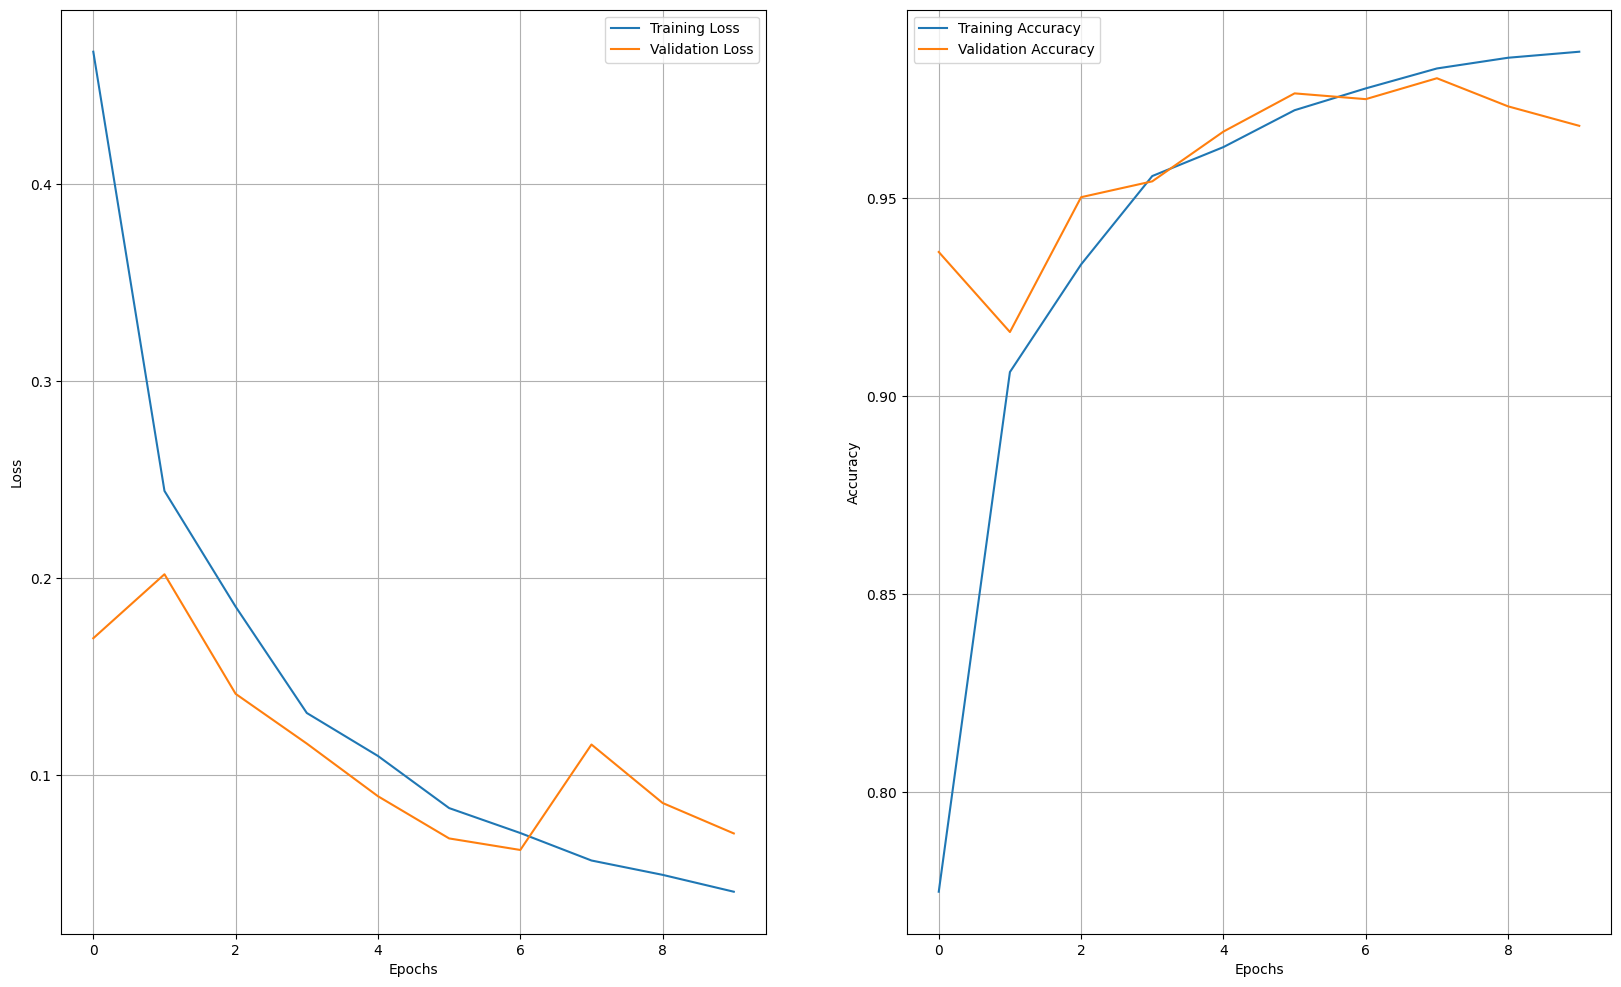

In [43]:
plt.figure(1, figsize = (20, 12))
plt.subplot(1,2,1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot( history.history["loss"], label = "Training Loss")
plt.plot( history.history["val_loss"], label = "Validation Loss")
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot( history.history["accuracy"], label = "Training Accuracy")
plt.plot( history.history["val_accuracy"], label = "Validation Accuracy")
plt.grid(True)
plt.legend()

In [44]:
model.evaluate(X_val,Y_val)

172/172 ━━━━━━━━━━━━━━━━━━━━ 30s 165ms/step - accuracy: 0.9691 - loss: 0.0668


[0.07027152180671692, 0.9683060050010681]

In [49]:
# Save the full model (architecture + weights)
model.save('/kaggle/working/my_model.h5')


In [29]:
from keras.models import Model, load_model

In [30]:
new_model=load_model('/kaggle/working/my_model.h5')

In [21]:
new_model.evaluate(X_val,Y_val)

172/172 ━━━━━━━━━━━━━━━━━━━━ 28s 145ms/step - accuracy: 0.9692 - loss: 0.0674


[0.07027150690555573, 0.9683060050010681]

In [64]:
print(Y[0])

1


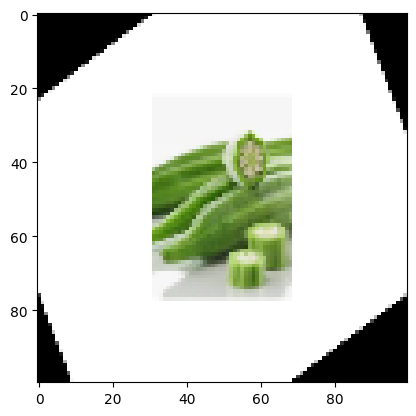

In [60]:
plt.imshow(X_val[1])

In [66]:
new_model.predict(X_val[1].reshape(1,100,100,3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[0.05087495]], dtype=float32)

In [63]:
def print_freshness_index(prediction):
    freshness_value = prediction[0][0]  # Extract the first prediction value
    print(f"Freshness Index: {freshness_value}")

    if freshness_value < 0.3:
        print("The fruit/vegetable is: Fresh")
    elif 0.3 <= freshness_value <= 0.7:
        print("The fruit/vegetable is: Medium Fresh")
    else:
        print("The fruit/vegetable is: Rotten")

# Example: predict freshness index for a single validation image
prediction = model.predict(X_val[1].reshape(1, 100, 100, 3))
print_freshness_index(prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Freshness Index: 0.050874948501586914
The fruit/vegetable is: Fresh


In [65]:
from sklearn.metrics import classification_report

# Evaluate on training data
train_predictions = (model.predict(X) > 0.5).astype(int)  # Convert predictions to binary (0 or 1)
print("Training Classification Report:")
print(classification_report(Y, train_predictions, target_names=['Fresh', 'Rotten']))

# Evaluate on validation (testing) data
val_predictions = (model.predict(X_val) > 0.5).astype(int)  # Convert predictions to binary (0 or 1)
print("Validation (Testing) Classification Report:")
print(classification_report(Y_val, val_predictions, target_names=['Fresh', 'Rotten']))


658/658 ━━━━━━━━━━━━━━━━━━━━ 78s 119ms/step
Training Classification Report:
              precision    recall  f1-score   support

       Fresh       0.97      0.99      0.98      9883
      Rotten       1.00      0.97      0.98     11161

    accuracy                           0.98     21044
   macro avg       0.98      0.98      0.98     21044
weighted avg       0.98      0.98      0.98     21044

172/172 ━━━━━━━━━━━━━━━━━━━━ 21s 120ms/step
Validation (Testing) Classification Report:
              precision    recall  f1-score   support

       Fresh       0.94      1.00      0.97      2720
      Rotten       1.00      0.94      0.97      2770

    accuracy                           0.97      5490
   macro avg       0.97      0.97      0.97      5490
weighted avg       0.97      0.97      0.97      5490

